## Load Dataset from 🤗

### Dataset Toxic/Hate-speech

In [204]:
from datasets import load_dataset

dataset = load_dataset('s-nlp/en_paradetox_toxicity')
dataset

DatasetDict({
    train: Dataset({
        features: ['comment', 'toxic'],
        num_rows: 26507
    })
})

In [205]:
import pandas as pd
df1 = pd.DataFrame(dataset['train'])
df1.head()

comment  toxic
0  ryan is as big a bum as the jerk in the white ...   True
1                             You sure are a racist!   True
2                   it is easy to spot those racist.  False
3  btw jonhson county is a real shithole in case ...   True
4  How many people does it take to change light b...  False

In [206]:
df1.shape

(26507, 2)

In [207]:
df1.to_csv('./dataset/en_paradetox_toxicity.csv', index=False)

#### dataset 2

In [208]:
dataset2 = load_dataset('dair-ai/emotion')
dataset2

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [209]:
train_df = pd.DataFrame(dataset2['train'])
validation_df = pd.DataFrame(dataset2['validation'])
test_df = pd.DataFrame(dataset2['test'])

# Concatenate the DataFrames
df2 = pd.concat([train_df, validation_df, test_df], ignore_index=True)
df2
# Filter the DataFrame to include rows with label value 3
df2_toxic = df2[df2['label'] == 3].replace(3, True)

df2_toxic.rename(columns={'text': 'comment', 'label':'toxic'}, inplace=True)
df2_toxic.rename

df2_toxic.head()


comment  toxic
2    im grabbing a minute to post i feel greedy wrong   True
4                                i am feeling grouchy   True
12  i think it s the easiest time of year to feel ...   True
20  i feel irritated and rejected without anyone d...   True
24  i already feel like i fucked up though because...   True

In [210]:
df2.to_csv('./dataset/emotion.csv', index=False)

#### dataset concat

In [6]:
df = pd.concat([df1, df2_toxic], ignore_index=True)
df

comment  toxic
0      ryan is as big a bum as the jerk in the white ...   True
1                                 You sure are a racist!   True
2                       it is easy to spot those racist.  False
3      btw jonhson county is a real shithole in case ...   True
4      How many people does it take to change light b...  False
...                                                  ...    ...
29211  i came out of the airport that makes me feel i...   True
29212  i feel tortured delilahlwl am considering i ha...   True
29213  i told my fiance how i am feeling so angry and...   True
29214  i just keep feeling like someone is being unki...   True
29215  im feeling a little cranky negative after this...   True

[29216 rows x 2 columns]

In [277]:
import pandas as pd

df = pd.read_csv('./dataset/data.csv')
df

comment  toxic  \
0      ryan is as big a bum as the jerk in the white ...   True   
1                                 You sure are a racist!   True   
2                       it is easy to spot those racist.  False   
3      btw jonhson county is a real shithole in case ...   True   
4      How many people does it take to change light b...  False   
...                                                  ...    ...   
29211  i came out of the airport that makes me feel i...   True   
29212  i feel tortured delilahlwl am considering i ha...   True   
29213  i told my fiance how i am feeling so angry and...   True   
29214  i just keep feeling like someone is being unki...   True   
29215  im feeling a little cranky negative after this...   True   

                                             new_comment  toxic_encoded  
0      ['ryan', 'be', 'as', 'big', 'a', 'bum', 'as', ...              1  
1                   ['you', 'sure', 'be', 'a', 'racist']              1  
2      ['it', 'be', 'easy', 'to', 'spot', 'those', 'r...              0  
3      ['btw', 'jonhson', 'county', 'be', 'a', 'real'...              1  
4      ['how', 'many', 'people', 'do', 'it', 'take', ...              0  
...                                                  ...            ...  
29211  ['i', 'come', 'out', 'of', 'the', 'airpo', 'th...              1  
29212  ['i', 'feel', 'to', 'ured', 'delilahlwl', 'be'...              1  
29213  ['i', 'tell', 'my', 'fiance', 'how', 'i', 'be'...              1  
29214  ['i', 'just', 'keep', 'feel', 'like', 'someone...              1  
29215  ['im', 'feel', 'a', 'little', 'cranky', 'negat...              1  

[29216 rows x 4 columns]

### Hoax Dataset

#### d1

In [210]:
hoax1 = load_dataset('pauwdanny/indonesian_hoax_news_dataset')
df = pd.DataFrame(hoax1['train'])

In [211]:
df

berita tagging
0    JAKARTA, Spokesperson for the Ministry of Fore...    Hoax
1    After the boom of the Pokemon Go game, several...   Valid
2    Did you know that stroke is a dangerous health...    Hoax
3    Terrorist inmates at the Mobile Brigade Comman...   Valid
4    Is it true that Facebook will be closed on Apr...   Valid
..                                                 ...     ...
817  The Pokemon hunting fever with the latest game...   Valid
818  Regarding the finding of candy snacks containi...    Hoax
819  The Muslim community was shocked by the news a...    Hoax
820  Garuda News – People who are hit by a STROKE a...    Hoax
821  The issue of the iPhone 6 Plus which users cla...    Hoax

[822 rows x 2 columns]

#### d2

In [222]:
# hoax2 = load_dataset('Rifky/indonesian-hoax-news')
# df2 = pd.DataFrame(hoax2['train'])
df2 = df2[['title']]
df2

title
0      [SALAH] Hillary Clinton Mengaku Terinspirasi o...
1      [SALAH] Foto Gadis 16 Tahun Yang Dipenjara 25 ...
2      [SALAH] Detik-Detik Densus 88 Bekuk Anak Kiai ...
3      [SALAH] Zul Zivilia Dieksekusi Mati – TurnBack...
4      [SALAH) Akun Whatsapp Kadis Kominfosanti Ketut...
...                                                  ...
17801  [DISINFORMASI] Perlakuan Berbeda antara GNPF M...
17802  Pilot Garuda Berkata Rasis saat Petugas Bea Cu...
17803     Surat Penetapan Pemberangkatan Haji Tahun 2018
17804     "Ramai Berita SetNov Warga China Terus Datang"
17805  [HOAX] "PKI DAN CINA SDH SIAP MERAMPAS INDONESIA"

[17806 rows x 1 columns]

In [246]:
df2 = df2[df2['title'].str.contains('\[.*\]')]

In [275]:
df2['label'] = df2['title'].str.extract(r'\[(.*?)\]')
df2["title"] = df2['title'].str.replace(r'\[(.*?)\]', '')
df2.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_25776\1086561425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label'] = df2['title'].str.extract(r'\[(.*?)\]')
C:\Users\Acer\AppData\Local\Temp\ipykernel_25776\1086561425.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2["title"] = df2['title'].str.replace(r'\[(.*?)\]', '')
C:\Users\Acer\AppData\Local\Temp\ipykernel_25776\1086561425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["title"] =

title  label
0   Hillary Clinton Mengaku Terinspirasi oleh Sri...  SALAH
1   Foto Gadis 16 Tahun Yang Dipenjara 25 Tahun K...  SALAH
2   Detik-Detik Densus 88 Bekuk Anak Kiai Kasus P...  SALAH
3      Zul Zivilia Dieksekusi Mati – TurnBackHoax.ID  SALAH
5   Video Cara Mengecek Minyak Goreng Bekas dan B...  SALAH

In [296]:
df2['title'][0]

' Hillary Clinton Mengaku Terinspirasi oleh Sri Mulyani dan Jokowi pada Debat Calon Presiden Amerika Serikat – TurnBackHoax.ID'

In [278]:
df2['label']

SALAH                  12351
KLARIFIKASI              575
HOAKS                    521
BENAR                    466
DISINFORMASI             421
                       ...  
Benar                      1
INFORMASI & EDUKASI        1
SCAM                       1
Hoax                       1
SATIRE                     1
Name: label, Length: 63, dtype: int64

#### d3

In [280]:
hoax3 = load_dataset('UKPLab/liar')
hoax3
# df3 = pd.DataFrame(hoax3['train'])

Repo card metadata block was not found. Setting CardData to empty.


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label_text', 'labels', 'context'],
        num_rows: 10269
    })
    validation: Dataset({
        features: ['text', 'label_text', 'labels', 'context'],
        num_rows: 1284
    })
    test: Dataset({
        features: ['text', 'label_text', 'labels', 'context'],
        num_rows: 1283
    })
})

In [282]:
train = pd.DataFrame(hoax3['train'])
test = pd.DataFrame(hoax3['test'])
val = pd.DataFrame(hoax3['validation'])
df3 = pd.concat([train, test, val], ignore_index=True)
df3

text       label_text  \
0      Dwayne Bohac says the Annies List political gr...  false statement   
1      Scott Surovell says When did the decline of co...   true statement   
2      Barack Obama says Hillary Clinton agrees with ...   true statement   
3      Blog Posting says Health care reform legislati...  false statement   
4      Charlie Crist says The economic turnaround sta...   true statement   
...                                                  ...              ...   
12831  Barack Obama says For the first time in more t...   true statement   
12832  Hillary Clinton says Donald Trump has bankrupt...   true statement   
12833  Campaign Defend America says John McCain and G...   true statement   
12834  Americans United Change says "A new poll shows...  false statement   
12835  Rudy Giuliani says No one claims the report vi...   true statement   

       labels                             context  
0           1                            a mailer  
1           0                     a floor speech.  
2           0                              Denver  
3           1                      a news release  
4           0                 an interview on CNN  
...       ...                                 ...  
12831       0                  a press conference  
12832       0             a speech on the economy  
12833       0                     a television ad  
12834       1                     an Internet ad.  
12835       0  comments on NBC's "Meet the Press"  

[12836 rows x 4 columns]

In [295]:
df3['text'][1]

'Scott Surovell says When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.'

## Preprocessing

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
contractions = {
    "aint": "am not",
    "arent": "are not",
    "cant": "cannot",
    "cantve": "cannot have",
    "cause": "because",
    "couldve": "could have",
    "couldnt": "could not",
    "couldntve": "could not have",
    "didnt": "did not",
    "doesnt": "does not",
    "dont": "do not",
    "dont": "do not",
    "hadnt": "had not",
    "hadntve": "had not have",
    "hasnt": "has not",
    "havent": "have not",
    "hed": "he would",
    "hedve": "he would have",
    "hell": "he will",
    "hellve": "he will have",
    "hes": "he is",
    "howd": "how did",
    "howdy": "how do you",
    "howll": "how will",
    "hows": "how is",
    "Id": "I would",
    "Idve": "I would have",
    "Ill": "I will",
    "Illve": "I will have",
    "Im": "I am",
    "Ive": "I have",
    "isnt": "is not",
    "itd": "it had",
    "itdve": "it would have",
    "itll": "it will",
    "itllve": "it will have",
    "its": "it is",
    "lets": "let us",
    "maam": "madam",
    "maynt": "may not",
    "mightve": "might have",
    "mightnt": "might not",
    "mightntve": "might not have",
    "mustve": "must have",
    "mustnt": "must not",
    "mustntve": "must not have",
    "neednt": "need not",
    "needntve": "need not have",
    "oclock": "of the clock",
    "oughtnt": "ought not",
    "oughtntve": "ought not have",
    "shant": "shall not",
    "shant": "shall not",
    "shantve": "shall not have",
    "shed": "she would",
    "shedve": "she would have",
    "shell": "she will",
    "shellve": "she will have",
    "shes": "she is",
    "shouldve": "should have",
    "shouldnt": "should not",
    "shouldntve": "should not have",
    "sove": "so have",
    "sos": "so is",
    "thatd": "that would",
    "thatdve": "that would have",
    "thats": "that is",
    "thered": "there had",
    "theredve": "there would have",
    "theres": "there is",
    "theyd": "they would",
    "theydve": "they would have",
    "theyll": "they will",
    "theyllve": "they will have",
    "theyre": "they are",
    "theyve": "they have",
    "tove": "to have",
    "wasnt": "was not",
    "wasnt": "was not",
    "wed": "we had",
    "wedve": "we would have",
    "well": "we will",
    "wellve": "we will have",
    "were": "we are",
    "weve": "we have",
    "werent": "were not",
    "whatll": "what will",
    "whatllve": "what will have",
    "whatre": "what are",
    "whats": "what is",
    "whatve": "what have",
    "whens": "when is",
    "whenve": "when have",
    "whered": "where did",
    "wheres": "where is",
    "whereve": "where have",
    "wholl": "who will",
    "whollve": "who will have",
    "whos": "who is",
    "whove": "who have",
    "whys": "why is",
    "whyve": "why have",
    "willve": "will have",
    "wont": "will not",
    "wontve": "will not have",
    "wouldve": "would have",
    "wouldnt": "would not",
    "wouldntve": "would not have",
    "yall": "you all",
    "yalld": "you all would",
    "yalldve": "you all would have",
    "yallre": "you all are",
    "yallve": "you all have",
    "youd": "you had",
    "youdve": "you would have",
    "youll": "you will",
    "youllve": "you will have",
    "youre": "you are",
    "youve": "you have",
}

def expand_contractions(text, contractions=contractions):
    words = text.split()
    expanded_text = ' '.join([contractions[word] if word in contractions else word for word in words])
    return expanded_text

In [18]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) - {'no', 'not'}

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) 
    text = re.sub('rt',' ',text)
    text = re.sub('user',' ',text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)
    text = re.sub('  +', ' ', text)
    return text

def remove_nonaplhanumeric(text):
    text = re.sub("[']", '', text)
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text
    
def preprocess(text):
    text = text.lower()
    text = remove_unnecessary_char(text)
    text = remove_nonaplhanumeric(text)
    text = expand_contractions(text)
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in word_tokenize(text) if word not in stop_words]
    return tokens

In [278]:
df['new_comment'] = df['comment'].apply(preprocess)
df

comment  toxic  \
0      ryan is as big a bum as the jerk in the white ...   True   
1                                 You sure are a racist!   True   
2                       it is easy to spot those racist.  False   
3      btw jonhson county is a real shithole in case ...   True   
4      How many people does it take to change light b...  False   
...                                                  ...    ...   
29211  i came out of the airport that makes me feel i...   True   
29212  i feel tortured delilahlwl am considering i ha...   True   
29213  i told my fiance how i am feeling so angry and...   True   
29214  i just keep feeling like someone is being unki...   True   
29215  im feeling a little cranky negative after this...   True   

                                             new_comment  toxic_encoded  
0                   [ryan, big, bum, jerk, white, house]              1  
1                                         [sure, racist]              1  
2                                   [easy, spot, racist]              0  
3      [btw, jonhson, county, real, shithole, case, w...              1  
4              [many, people, take, change, light, bulb]              0  
...                                                  ...            ...  
29211  [come, airpo, make, feel, irritable, uncomfo, ...              1  
29212  [feel, ured, delilahlwl, consider, one, day, o...              1  
29213                 [tell, fiance, feel, angry, upset]              1  
29214  [keep, feel, like, someone, unkind, wrong, thi...              1  
29215  [im, feel, little, cranky, negative, doctor, a...              1  

[29216 rows x 4 columns]

In [283]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df['toxic_encoded'] = encoder.fit_transform(df[['toxic']]).astype(int)
df

comment  toxic  \
0      ryan is as big a bum as the jerk in the white ...   True   
1                                 You sure are a racist!   True   
2                       it is easy to spot those racist.  False   
3      btw jonhson county is a real shithole in case ...   True   
4      How many people does it take to change light b...  False   
...                                                  ...    ...   
29211  i came out of the airport that makes me feel i...   True   
29212  i feel tortured delilahlwl am considering i ha...   True   
29213  i told my fiance how i am feeling so angry and...   True   
29214  i just keep feeling like someone is being unki...   True   
29215  im feeling a little cranky negative after this...   True   

                                             new_comment  toxic_encoded  
0                   [ryan, big, bum, jerk, white, house]              1  
1                                         [sure, racist]              1  
2                                   [easy, spot, racist]              0  
3      [btw, jonhson, county, real, shithole, case, w...              1  
4              [many, people, take, change, light, bulb]              0  
...                                                  ...            ...  
29211  [come, airpo, make, feel, irritable, uncomfo, ...              1  
29212  [feel, ured, delilahlwl, consider, one, day, o...              1  
29213                 [tell, fiance, feel, angry, upset]              1  
29214  [keep, feel, like, someone, unkind, wrong, thi...              1  
29215  [im, feel, little, cranky, negative, doctor, a...              1  

[29216 rows x 4 columns]

In [124]:
df.to_csv('data.csv', index=False)

# Get Insight

In [256]:
df1['toxic'].value_counts()

False    22498
True      4009
Name: toxic, dtype: int64

<AxesSubplot:xlabel='toxic'>

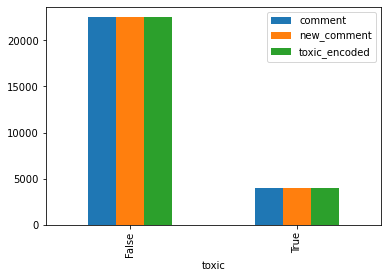

In [257]:
df1.groupby('toxic').count().plot.bar()

# Modelling

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['new_comment'], df['toxic_encoded'], test_size=0.2, shuffle=False)

In [285]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23372,), (5844,), (23372,), (5844,))

In [287]:
import re
import math
from collections import defaultdict

class NaiveBayesClassifier:
    def __init__(self):
        self.class_probabilities = defaultdict(float)
        self.word_given_class_probabilities = defaultdict(lambda: defaultdict(float))

    def fit(self, X, y, smoothing=False):
        alpha = 0.0
        if smoothing:
            alpha = 1.0
            print('\n\n===== Naive Bayes w/ Laplace smoothing =====')
        else:
            print('\n\n===== Naive Bayes w/o Laplace smoothing =====')

        total_documents = len(X)

        for label in set(y):
            print(f'\n--> Words in label: {label}\n')
            documents_in_class = sum(1 for label_i in y if label_i == label)

            if smoothing:
                self.class_probabilities[label] = (documents_in_class + alpha) / (total_documents + alpha * len(set(y)))
                print(f'P({label}) = ({documents_in_class} + {alpha}) / ({total_documents} + {alpha} * {len(set(y))}) = {self.class_probabilities[label]}\n')
            else:
                self.class_probabilities[label] = documents_in_class / total_documents
                print(f'P({label}) = {documents_in_class} / {total_documents} = {self.class_probabilities[label]}\n')
        
            words_in_class = [word for sublist in [X[i] for i in range(len(X)) if y[i] == label] for word in sublist]
            total_words_in_class = len(words_in_class)
            print(f'Total words in class {label} = {total_words_in_class}\n')

            for word in set(words_in_class):
                word_frequency = words_in_class.count(word)
                print(f'{word} appears {word_frequency} times')

                if smoothing:
                    self.word_given_class_probabilities[label][word] = (word_frequency + alpha) / (total_words_in_class + alpha * len(set(words_in_class)))
                    print(f'P({word}|{label}) = ({word_frequency} + {alpha}) / ({total_words_in_class} + {alpha} * {len(set(words_in_class))}) = {self.word_given_class_probabilities[label][word]}')
                else:
                    self.word_given_class_probabilities[label][word] = word_frequency / total_words_in_class
                    print(f'P({word}|{label}) = {word_frequency} / {total_words_in_class} = {self.word_given_class_probabilities[label][word]}')

    def predict(self, document):
        scores = defaultdict(float)
        for label in self.class_probabilities:
            scores[label] = math.log(self.class_probabilities[label])

            for word in document:
                if word in self.word_given_class_probabilities[label]:
                    scores[label] += math.log(self.word_given_class_probabilities[label][word])
        print(scores)
        return max(scores, key=scores.get)

In [286]:
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train, smoothing=False)



===== Naive Bayes w/o Laplace smoothing =====

--> Words in label: 0

P(0) = 19731 / 23372 = 0.8442153003594044

Total words in class 0 = 91710

disturb appears 17 times
P(disturb|0) = 17 / 91710 = 0.00018536691745720205
clown appears 5 times
P(clown|0) = 5 / 91710 = 5.4519681605059426e-05
tuesday appears 1 times
P(tuesday|0) = 1 / 91710 = 1.0903936321011885e-05
nfl appears 6 times
P(nfl|0) = 6 / 91710 = 6.542361792607131e-05
financially appears 1 times
P(financially|0) = 1 / 91710 = 1.0903936321011885e-05
youself appears 2 times
P(youself|0) = 2 / 91710 = 2.180787264202377e-05
identical appears 1 times
P(identical|0) = 1 / 91710 = 1.0903936321011885e-05
fresh appears 9 times
P(fresh|0) = 9 / 91710 = 9.813542688910697e-05
aweful appears 1 times
P(aweful|0) = 1 / 91710 = 1.0903936321011885e-05
indian appears 3 times
P(indian|0) = 3 / 91710 = 3.271180896303566e-05
air appears 19 times
P(air|0) = 19 / 91710 = 0.0002071747900992258
pan appears 1 times
P(pan|0) = 1 / 91710 = 1.09039363210

In [250]:
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train, smoothing=False)



===== Naive Bayes w/o Laplace smoothing =====

--> Words in label: 0

P(0) = 17831 / 21205 = 0.8408865833529828

Total words in class 0 = 83009

disturb appears 15 times
P(disturb|0) = 15 / 83009 = 0.00018070329723283017
clown appears 5 times
P(clown|0) = 5 / 83009 = 6.023443241094339e-05
nfl appears 6 times
P(nfl|0) = 6 / 83009 = 7.228131889313207e-05
financially appears 1 times
P(financially|0) = 1 / 83009 = 1.2046886482188679e-05
youself appears 2 times
P(youself|0) = 2 / 83009 = 2.4093772964377358e-05
identical appears 1 times
P(identical|0) = 1 / 83009 = 1.2046886482188679e-05
fresh appears 9 times
P(fresh|0) = 9 / 83009 = 0.00010842197833969811
aweful appears 1 times
P(aweful|0) = 1 / 83009 = 1.2046886482188679e-05
indian appears 3 times
P(indian|0) = 3 / 83009 = 3.6140659446566035e-05
air appears 18 times
P(air|0) = 18 / 83009 = 0.00021684395667939622
pan appears 1 times
P(pan|0) = 1 / 83009 = 1.2046886482188679e-05
anonymous appears 9 times
P(anonymous|0) = 9 / 83009 = 0.0001

In [251]:
nb_laplace_classifier = NaiveBayesClassifier()
nb_laplace_classifier.fit(X_train, y_train, smoothing=True)



===== Naive Bayes w/ Laplace smoothing =====

--> Words in label: 0

P(0) = (17831 + 1.0) / (21205 + 1.0 * 2) = 0.8408544348564153

Total words in class 0 = 83009

disturb appears 15 times
P(disturb|0) = (15 + 1.0) / (83009 + 1.0 * 8490) = 0.0001748652990743068
clown appears 5 times
P(clown|0) = (5 + 1.0) / (83009 + 1.0 * 8490) = 6.557448715286506e-05
nfl appears 6 times
P(nfl|0) = (6 + 1.0) / (83009 + 1.0 * 8490) = 7.650356834500923e-05
financially appears 1 times
P(financially|0) = (1 + 1.0) / (83009 + 1.0 * 8490) = 2.185816238428835e-05
youself appears 2 times
P(youself|0) = (2 + 1.0) / (83009 + 1.0 * 8490) = 3.278724357643253e-05
identical appears 1 times
P(identical|0) = (1 + 1.0) / (83009 + 1.0 * 8490) = 2.185816238428835e-05
fresh appears 9 times
P(fresh|0) = (9 + 1.0) / (83009 + 1.0 * 8490) = 0.00010929081192144176
aweful appears 1 times
P(aweful|0) = (1 + 1.0) / (83009 + 1.0 * 8490) = 2.185816238428835e-05
indian appears 3 times
P(indian|0) = (3 + 1.0) / (83009 + 1.0 * 8490)

In [288]:
nb_classifier_20 = NaiveBayesClassifier()
nb_classifier_20.fit(X_train, y_train, smoothing=False)



===== Naive Bayes w/o Laplace smoothing =====

--> Words in label: 0

P(0) = 19731 / 23372 = 0.8442153003594044

Total words in class 0 = 91710

disturb appears 17 times
P(disturb|0) = 17 / 91710 = 0.00018536691745720205
clown appears 5 times
P(clown|0) = 5 / 91710 = 5.4519681605059426e-05
tuesday appears 1 times
P(tuesday|0) = 1 / 91710 = 1.0903936321011885e-05
nfl appears 6 times
P(nfl|0) = 6 / 91710 = 6.542361792607131e-05
financially appears 1 times
P(financially|0) = 1 / 91710 = 1.0903936321011885e-05
youself appears 2 times
P(youself|0) = 2 / 91710 = 2.180787264202377e-05
identical appears 1 times
P(identical|0) = 1 / 91710 = 1.0903936321011885e-05
fresh appears 9 times
P(fresh|0) = 9 / 91710 = 9.813542688910697e-05
aweful appears 1 times
P(aweful|0) = 1 / 91710 = 1.0903936321011885e-05
indian appears 3 times
P(indian|0) = 3 / 91710 = 3.271180896303566e-05
air appears 19 times
P(air|0) = 19 / 91710 = 0.0002071747900992258
pan appears 1 times
P(pan|0) = 1 / 91710 = 1.09039363210

In [220]:
nb_laplace_classifier_20 = NaiveBayesClassifier()
nb_laplace_classifier_20.fit(X_train, y_train, smoothing=True)



===== Naive Bayes w/ Laplace smoothing =====

--> Words in label: 0

P(0) = (19731 + 1.0) / (23372 + 1.0 * 2) = 0.8441858475228887

Total words in class 0 = 91710

disturb appears 17 times
P(disturb|0) = (17 + 1.0) / (91710 + 1.0 * 9056) = 0.00017863168132108053
clown appears 5 times
P(clown|0) = (5 + 1.0) / (91710 + 1.0 * 9056) = 5.9543893773693506e-05
tuesday appears 1 times
P(tuesday|0) = (1 + 1.0) / (91710 + 1.0 * 9056) = 1.984796459123117e-05
nfl appears 6 times
P(nfl|0) = (6 + 1.0) / (91710 + 1.0 * 9056) = 6.946787606930909e-05
financially appears 1 times
P(financially|0) = (1 + 1.0) / (91710 + 1.0 * 9056) = 1.984796459123117e-05
youself appears 2 times
P(youself|0) = (2 + 1.0) / (91710 + 1.0 * 9056) = 2.9771946886846753e-05
identical appears 1 times
P(identical|0) = (1 + 1.0) / (91710 + 1.0 * 9056) = 1.984796459123117e-05
fresh appears 9 times
P(fresh|0) = (9 + 1.0) / (91710 + 1.0 * 9056) = 9.923982295615585e-05
aweful appears 1 times
P(aweful|0) = (1 + 1.0) / (91710 + 1.0 * 9

# Metric Performance

In [231]:
import numpy as np

def metric_performance(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError("Lengths of y_true and y_pred must be the same.")

    true_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == pred == 1)
    false_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == 0 and pred == 1)
    false_negatives = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 0)
    true_negatives = sum(1 for true, pred in zip(y_true, y_pred) if true == pred == 0)
    correct_predictions = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)

    accuracy = correct_predictions / len(y_true) if len(y_true) > 0 else 0
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    confusion_matrix = np.array([[true_positives, false_positives], [false_negatives, true_negatives]])

    metrics = {
        'confusion_matrix':confusion_matrix,
        'accuracy': f'{accuracy*100:.2f}',
        'precision': f'{precision*100:.2f}',
        'recall': f'{recall*100:.2f}',
        'f1_score': f'{f1_score*100:.2f}'
    }

    return metrics

In [253]:
metric_performance(y_test, [nb_classifier.predict(document) for document in X_test])

{'confusion_matrix': array([[ 358, 1528],
        [ 277, 3139]]),
 'accuracy': '65.96',
 'precision': '18.98',
 'recall': '56.38',
 'f1_score': '28.40'}

In [254]:
metric_performance(y_test, [nb_laplace_classifier_20.predict(document) for document in X_test])

{'confusion_matrix': array([[ 281, 1688],
        [ 354, 2979]]),
 'accuracy': '61.49',
 'precision': '14.27',
 'recall': '44.25',
 'f1_score': '21.58'}

### model with added dataset from emotion.csv

the accuracy are lower but have higher f1 score

In [233]:
metric_performance(y_test, [nb_classifier_20.predict(document) for document in X_test])

{'confusion_matrix': array([[1520,  814],
        [1557, 1953]]),
 'accuracy': '59.43',
 'precision': '65.12',
 'recall': '49.40',
 'f1_score': '56.18'}

In [232]:
metric_performance(y_test, [nb_laplace_classifier_20.predict(document) for document in X_test])

{'confusion_matrix': array([[1492,  809],
        [1585, 1958]]),
 'accuracy': '59.03',
 'precision': '64.84',
 'recall': '48.49',
 'f1_score': '55.49'}

# Test on sentences

In [274]:
def predict_comment(comment):
    comment = preprocess(comment)
    pred = nb_classifier_20.predict(comment)
    if pred == 1:
        return 'toxic'
    else:
        return 'non-toxic'

In [300]:
predict_comment('you make me want to smash your skull')

defaultdict(<class 'float'>, {0: -32.650465665484205, 1: -22.568801690157642})


'toxic'

In [309]:
predict_comment('the weather is nice today')

defaultdict(<class 'float'>, {0: -22.977404862247447, 1: -27.191320514480346})


'non-toxic'

In [293]:
predict_comment('I hate you so much, you should die already')

defaultdict(<class 'float'>, {0: -27.768099876929604, 1: -28.306307803999296})


'non-toxic'

In [ ]:
predict_comment('')